# 이미지 분류 (합성곱신경망, CNN)
---
fashon-MNIST data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [5]:
## Label	Description
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

## 시각화

In [6]:
sample = np.random.randint(60000, size=9)
sample

array([40408, 48028, 14538, 23462, 33087, 21665, 56704, 53754, 53620])

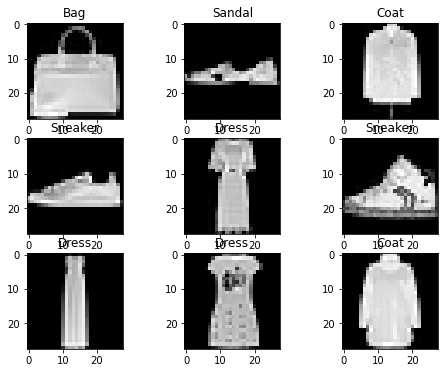

In [7]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(sample):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[idx], cmap='gray')
  # plt.xticks([])
  # plt.yticks([])
  plt.title(class_name[ y_train[idx]])
# i에는 번호가, idx에는 sample의 값들 (55246, ...)이 저장됨
plt.show()

## 검증용 데이터 (Validation Data)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

X_train.shape, X_val.shape, X_test.shape

((42000, 28, 28), (18000, 28, 28), (10000, 28, 28))

## 정규화

In [9]:
# MinMax 

X_train = X_train.astype('float32')/255.
X_val = X_val/255.
X_test = X_test/255.

In [10]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [11]:
y_train[:10]

array([4, 0, 7, 8, 4, 0, 1, 0, 6, 8], dtype=uint8)

In [12]:
# one-hot-encoding (다중분류)
from tensorflow.keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)
y_test_o = to_categorical(y_test)
y_train_o[:10]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

## 모델

In [13]:
X_train.shape

(42000, 28, 28)

In [14]:
# flatten 할 필요 없음
# X_train = X_train.reshape(-1, 28*28)
# X_val = X_val.reshape(-1, 28*28)
# X_test = X_test.reshape(-1, 28*28)
# X_train.shape

In [15]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(42000, 28, 28, 1)

In [16]:
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [17]:
# Sequential을 생성할 때 레이어를 동시에 지정
def build_model_1():

  model = keras.Sequential([
      layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=(28,28,1)),
      layers.MaxPool2D(pool_size=(2,2)),
      layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
      layers.MaxPool2D(pool_size=(2,2)),

      layers.Flatten(),

      layers.Dense(units=32, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['acc']
  )
  return model

model = build_model_1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [19]:
X_val.shape, y_val_o.shape

((18000, 28, 28, 1), (18000, 10))

In [20]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_o,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val_o),
                verbose = 1)

Epoch 1/50
1313/1313 [==============================] - 83s 62ms/step - loss: 0.5613 - acc: 0.7996 - val_loss: 0.3945 - val_acc: 0.8610
Epoch 2/50
1313/1313 [==============================] - 62s 47ms/step - loss: 0.3673 - acc: 0.8675 - val_loss: 0.3477 - val_acc: 0.8740
Epoch 3/50
1313/1313 [==============================] - 55s 42ms/step - loss: 0.3200 - acc: 0.8842 - val_loss: 0.3403 - val_acc: 0.8800
Epoch 4/50
1313/1313 [==============================] - 49s 37ms/step - loss: 0.2844 - acc: 0.8972 - val_loss: 0.2953 - val_acc: 0.8942
Epoch 5/50
1313/1313 [==============================] - 69s 53ms/step - loss: 0.2593 - acc: 0.9049 - val_loss: 0.2845 - val_acc: 0.8959
Epoch 6/50
1313/1313 [==============================] - 50s 38ms/step - loss: 0.2379 - acc: 0.9130 - val_loss: 0.2782 - val_acc: 0.8993
Epoch 7/50
1313/1313 [==============================] - 55s 42ms/step - loss: 0.2162 - acc: 0.9200 - val_loss: 0.2757 - val_acc: 0.9009
Epoch 8/50
1313/1313 [==========================

KeyboardInterrupt: ignored

In [21]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

In [22]:
plot_history(log)

NameError: ignored

## 평가

In [ ]:
model.evaluate(X_train, y_train_o)

In [ ]:
model.evaluate(X_test, y_test_o)

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred[:5]

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='1')

### 오답 이미지 시각화

In [ ]:
wrong = np.where((y_test == y_pred) == False)[0]
samples = np.random.choice(wrong, 9)
samples

In [ ]:
X_test = X_test.reshape(-1,28,28)

In [ ]:
plt.figure(figsize=(8,6))
for i, idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[idx], cmap='gray')
  plt.axis('off')
  plt.title(f'{class_name[ y_test[idx]]}, ({class_name[ y_pred[idx]]})')
# i에는 번호가, idx에는 sample의 값들 (55246, ...)이 저장됨
plt.show()

---
# 모델1-2

In [ ]:
# Sequential을 생성하고, 이후에 add하여 추가하는 방법
# 조건에 따라 움직일때 편리리
def build_model_2():

  model = keras.Sequential()
  model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=(28,28,1)))
  model.add(layers.MaxPool2D(pool_size=(2,2)))
  model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(layers.MaxPool2D(pool_size=(2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(units=32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['acc']
  )
  return model

model = build_model_2()
model.summary()

# 모델2

함수형 API

In [ ]:
# Sequential로 만들 수 없는 모델을 만들 경우 사용
# chain처럼 꼬리에 꼬리를 물고 결과값이 parameter로 들어감
from tensorflow.keras.models import Model

def build_model_3():
  inputs = layers.input(shape=(28,28,1))
  x1 = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
  x2 = layers.MaxPool2D(pool_size=(2,2))(x1)
  x3 = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x2)
  x4 = layers.MaxPool2D(pool_size=(2,2))(x3)
  x5 = layers.Flatten()(x4)
  x6 = layers.Dense(units=32, activation='relu')(x5)
  outputs = layers.Dense(10, activation='softmax')(x6)

  model = Model(inputs = inputs, outputs = outputs)

  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['acc']
  )
  return model

model = build_model_3()
model.summary()

### 입력이 2개인 임의의 모델

In [ ]:
inputX = layers.input(shape=(16))
x1 = layers.Dense(8, activation='relu')(inputX)
x2 = layers.Dense(16, activation='relu')(x1)
x3 = Model(inputs=inputX, outputs=x2)

inputY = layers.input(shape=(16))
y1 = layers.Dense(8, activation='relu')(inputY)
y2 = layers.Dense(16, activation='relu')(y1)
y3 = Model(inputs=inputY, outputs=y2)

combined = layers.concatenate([x3.output, y3.output])
z1 = layers.Dense(2, activation='relu')(combined)
z2 = layers.Dense(1)(z1)

model = Model(inputs=[x3.input, y3.input], outputs=z2)

In [ ]:
tf.keras.utils.plot_model(model)

# 모델 3

서브 클래싱 (Subclassing)

In [ ]:
# 모델을 클래스로 만듦

class MnistModel(Model):
  def __init__(self):
    super(MnistModel, self).__init__()

    self.conv1 = layers.Conv2D(32,3,activation='relu')
    self.conv2 = layers.Conv2D(64,3,activation='relu')
    self.maxpool = layers.MaxPooling3D(2)
    self.flat = layers.Flatten()
    self.dense1 = layers.Dense(32, activation='relu')
    self.dense2 = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.maxpool(x)
    x = self.conv2(x)
    x = self.maxpool(x)
    x = self.flat(x)
    x = self.dense1(x)
    outputs = self.dense2(x)
    return outputs

In [ ]:
model = MnistModel()

model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['acc']
  )

# model.fit( ... )